In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import json
import statistics
print(pd.__version__)

2.1.4


In [22]:
with open("./data/ER_2024_01_11.json") as f:
    data = json.load(f)
    places = data

m = folium.Map(
    location=[52.237049, 21.017532],
    tiles="Cartodb Positron",
    zoom_start=7,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False,
)

for place in places:
    folium.Marker(
        location=[place["location"]["lat"], place["location"]["lng"]],
        popup=place["title"],
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(m)

m

In [8]:
filtered_scores = [entry["totalScore"] for entry in places if entry["totalScore"] is not None]

# Calculate mean and median
mean_value = statistics.mean(filtered_scores)
median_value = statistics.median(filtered_scores)

# Calculate average
total_sum = sum(filtered_scores)
average_value = total_sum / len(filtered_scores)

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Average: {average_value}")

Mean: 4.684705882352941
Median: 4.8
Average: 4.684705882352939


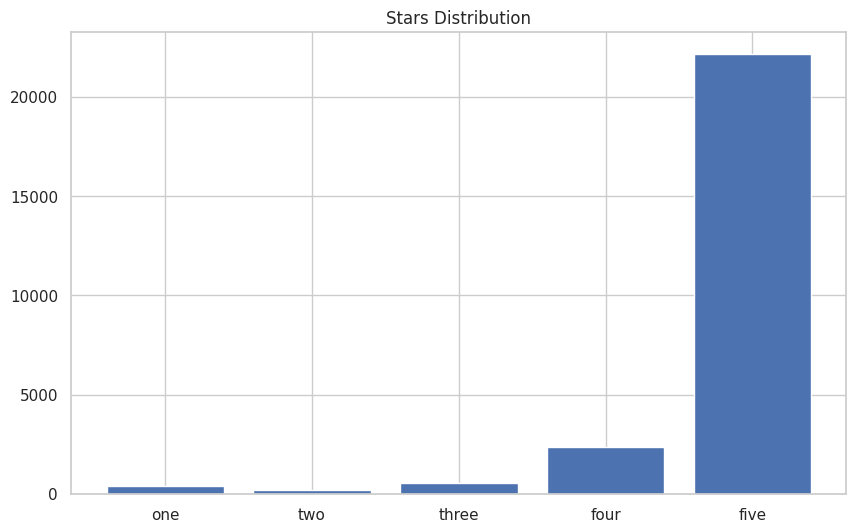

In [21]:
_df = pd.json_normalize(data)

# Sum all items in each category
total_one_star = _df['reviewsDistribution.oneStar'].sum()
total_two_star = _df['reviewsDistribution.twoStar'].sum()
total_three_star = _df['reviewsDistribution.threeStar'].sum()
total_four_star = _df['reviewsDistribution.fourStar'].sum()
total_five_star = _df['reviewsDistribution.fiveStar'].sum()

# Create the JSON object
stars = {
    "one": total_one_star,
    "two": total_two_star,
    "three": total_three_star,
    "four": total_four_star,
    "five": total_five_star
}

# Print the JSON object
# print(stars)

# Assuming the stars dictionary is stored in a variable called 'stars'
labels = stars.keys()
values = stars.values()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title('Stars Distribution')
plt.show()

## Load and show empty columns

Do sprawdzenia:
  - godziny otwarcia
  - rozkład ocen
  - liczba ocen
  - ile wizytówek jest reklamą
  - jakie kategorie są wpisywane w rodzaj biznesu
  - `popularTimesHistogram` - w jakich godzinach są klienci

Recenzje:
  - data pierwszej/ostatniej recenzji
  - średnia liczba recenzji na miesiąć
  - w jakim miesiącu było najwięcej recenzji (+ ilość), czy był peak?
  

  

<Axes: >

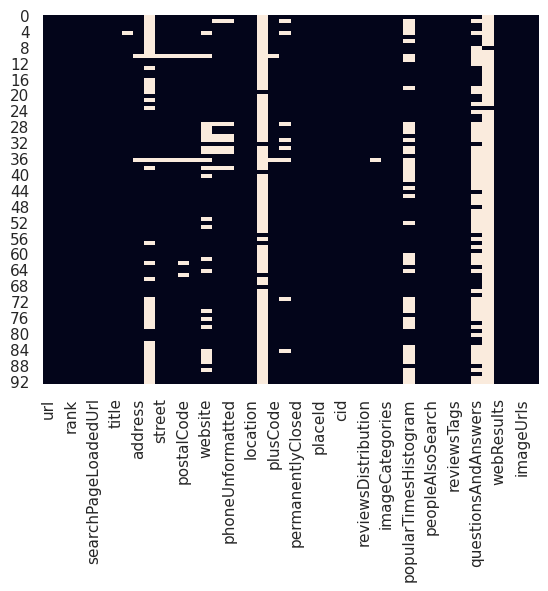

In [23]:
df = pd.read_json("./data/ER_2024_01_11.json")
df.drop(
    [
        "reserveTableUrl",
        "googleFoodUrl",
        "hotelStars",
        "hotelDescription",
        "checkInDate",
        "checkOutDate",
        "similarHotelsNearby",
        "hotelReviewSummary",
        "hotelAds",
        "popularTimesLiveText",
        "popularTimesLivePercent",
        "gasPrices"
    ],
    axis=1,
    inplace=True,
)
df.dropna(how='all', axis=1, inplace=True)
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df.columns

Index(['url', 'searchString', 'rank', 'searchPageUrl', 'searchPageLoadedUrl',
       'isAdvertisement', 'title', 'categoryName', 'address', 'neighborhood',
       'street', 'city', 'postalCode', 'countryCode', 'website', 'phone',
       'phoneUnformatted', 'claimThisBusiness', 'location', 'locatedIn',
       'plusCode', 'totalScore', 'permanentlyClosed', 'temporarilyClosed',
       'placeId', 'categories', 'cid', 'reviewsCount', 'reviewsDistribution',
       'imagesCount', 'imageCategories', 'scrapedAt', 'popularTimesHistogram',
       'openingHours', 'peopleAlsoSearch', 'placesTags', 'reviewsTags',
       'additionalInfo', 'gasPrices', 'questionsAndAnswers',
       'updatesFromCustomers', 'webResults', 'orderBy', 'imageUrls',
       'reviews'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    93 non-null     object 
 1   searchString           93 non-null     object 
 2   rank                   93 non-null     int64  
 3   searchPageUrl          93 non-null     object 
 4   searchPageLoadedUrl    93 non-null     object 
 5   isAdvertisement        93 non-null     bool   
 6   title                  93 non-null     object 
 7   categoryName           92 non-null     object 
 8   address                91 non-null     object 
 9   neighborhood           51 non-null     object 
 10  street                 91 non-null     object 
 11  city                   91 non-null     object 
 12  postalCode             89 non-null     object 
 13  countryCode            91 non-null     object 
 14  website                69 non-null     object 
 15  phone   

In [11]:
df.head(5)


,url,searchString,rank,searchPageUrl,searchPageLoadedUrl,isAdvertisement,title,categoryName,address,neighborhood,...,peopleAlsoSearch,placesTags,reviewsTags,additionalInfo,questionsAndAnswers,updatesFromCustomers,webResults,orderBy,imageUrls,reviews
0,https://www.google.com/maps/place/Cybermagia+-...,escape room,19,https://www.google.com/maps/search/escape%20ro...,https://www.google.com/maps/search/escape+room...,False,Cybermagia - Centrum Rozrywki VR,Organizator imprez,"Pośpiecha 2, 40-850 Katowice, Polska",None,...,"[{'category': 'Inni wyszukiwali również', 'tit...",[],[],{'Dostępne opcje': [{'Usługi na miejscu': True...,{'question': '(Przetłumaczone przez Google) Cz...,None,[],"[{'name': 'cybermagia.com.pl', 'url': 'https:/...",[],"[{'name': 'Paweł Blachnicki', 'text': 'Bardzo ..."
1,https://www.google.com/maps/place/Familock+Esc...,escape room,17,https://www.google.com/maps/search/escape%20ro...,https://www.google.com/maps/search/escape+room...,False,Familock Escape Room,Centrum typu „escape room”,"Cmentarna 5, 41-600 Świętochłowice, Polska",None,...,[],[],[],"{'Udogodnienia': [{'Toaleta': True}, {'Toaleta...",None,None,[],[],[],[]
2,https://www.google.com/maps/place/Gamerooms.pl...,escape room,18,https://www.google.com/maps/search/escape%20ro...,https://www.google.com/maps/search/escape+room...,False,Gamerooms.pl,Salon gier wideo,"Graniczna 29, 40-017 Katowice, Polska",None,...,"[{'category': 'Inni wyszukiwali również', 'tit...",[],[],{'Dzieci': [{'Odpowiednie dla dzieci': True}]},{'question': 'I jeszcze coś Czy Można Tam zrob...,None,[],"[{'name': 'gamerooms.pl', 'url': 'https://game...",[],"[{'name': 'Marysia Szymańska', 'text': 'Właści..."
3,https://www.google.com/maps/place/Dom+Strachu+...,escape room,20,https://www.google.com/maps/search/escape%20ro...,https://www.google.com/maps/search/escape+room...,False,Dom Strachu Asylum,Nawiedzony dom,"3 Maja 23, 40-096 Katowice, Polska",None,...,"[{'category': 'Inni wyszukiwali również', 'tit...",[],[],{'Ułatwienia dostępu': [{'Parking dostępny dla...,"{'question': 'Od ilu lat to jest??? ', 'answer...",None,[],[],[],"[{'name': 'anikonful', 'text': 'Byłam wczoraj ..."
4,https://www.google.com/maps/place/Mobilny+Esca...,escape room,14,https://www.google.com/maps/search/escape%20ro...,https://www.google.com/maps/search/escape+room...,False,Mobilny Escape Room,None,"9, Świętego Stanisława, 40-014 Katowice, Polska",None,...,"[{'category': 'Inni wyszukiwali również', 'tit...",[],[],{},None,None,[],[],[],[]
